<a href="https://colab.research.google.com/github/ZiaulKarim245/Projects/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download necessary tools and libary

In [ ]:
pip install bnlp_toolkit

Import necessary libary

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from bnlp import BasicTokenizer
import os
import re

Upload reviews

In [ ]:
try:
    df = pd.read_excel('reviews.xlsx', engine='openpyxl')
    print("Reviews loaded!")
except FileNotFoundError:
    print("Error: Missing 'reviews.xlsx'")
    exit()

Reviews loaded!


Use bangla font

In [ ]:
font_name = "kalpurush.ttf"
if not os.path.exists(font_name):
  print(f"Error: {font_name} is missing.")
  exit()

Bangla Tokenaizer

In [ ]:
tokenizer = BasicTokenizer()

def tokenize_text(reviews):
  tokens = tokenizer.tokenize(reviews)
  return ' '.join(tokens)

Define Stopwords

In [ ]:
stopwords = set(STOPWORDS)
custom_words = {
    'ei', 'ta', 'kora', 'kor', 'sil', 'silo', 'ase', 'er',
    'এবং', 'ও', 'এর', 'কে', 'যে', 'হলো', 'করা', 'তো', 'না', 'কি',
    'হয়', 'তা', 'সে', 'সব', 'এই', 'করে', 'থেকে', 'জন্য', 'নিয়ে',
    'app', 'website', 'student', 'course', 'class', 'video',
    'আমি', 'তুমি', 'আপনি', 'আমার', 'তোমার', 'হয়েছে', 'ছিল', 'আছে'
}
stopwords.update(custom_words)

Reviews preprocessing

In [ ]:
df['Review'] = df['Review'].fillna('').astype(str)
unique_companies = df['Company'].dropna().unique()

Generate wordclouds

Processing Programming Hero...
Saved: Cloud_Programming Hero.png


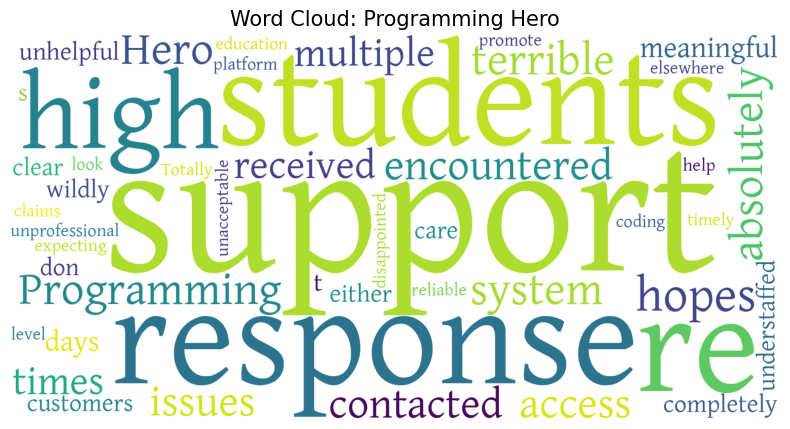

Processing Innovative Skills LTD...
Saved: Cloud_Innovative Skills LTD.png


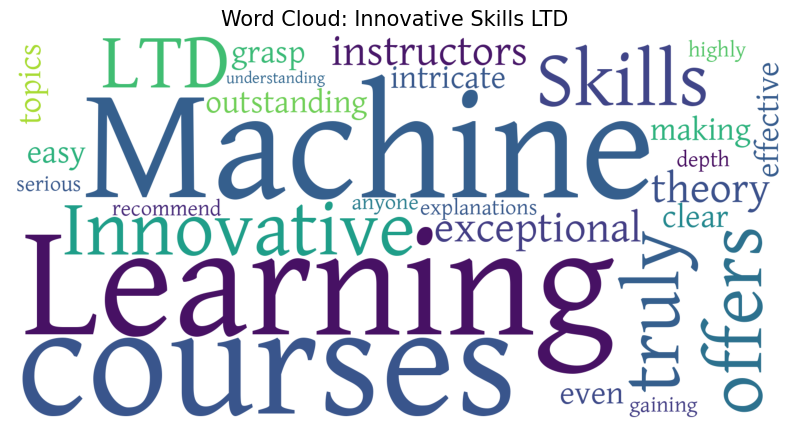

Processing aiQuest Intelligence...
Saved: Cloud_aiQuest Intelligence.png


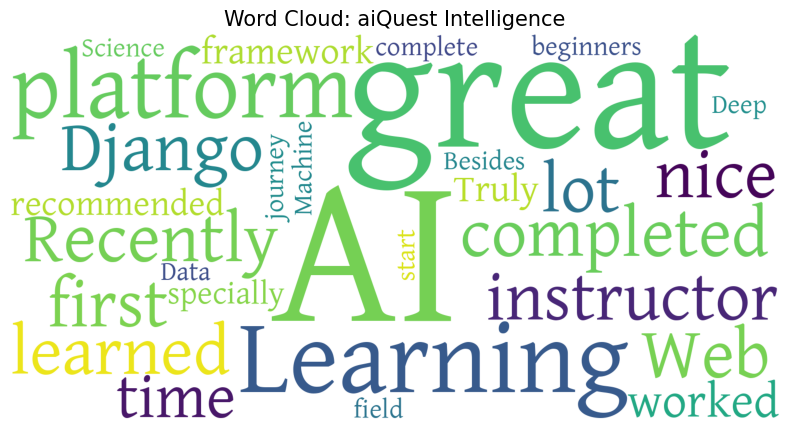

Processing Ostad...
Saved: Cloud_Ostad.png


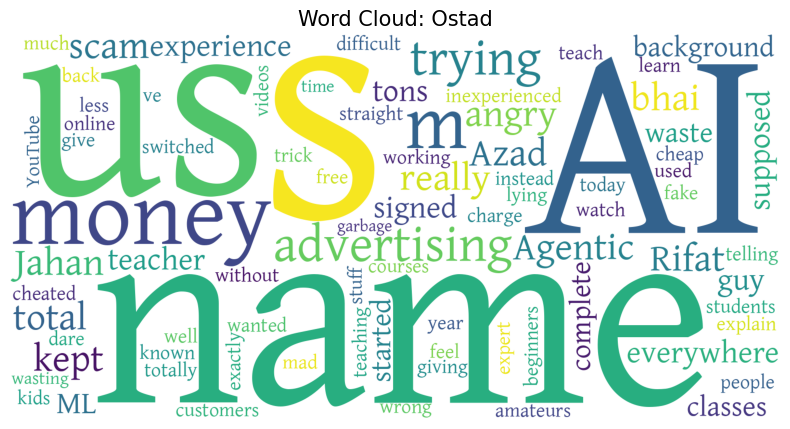

Processing Learning Bangladesh...
Saved: Cloud_Learning Bangladesh.png


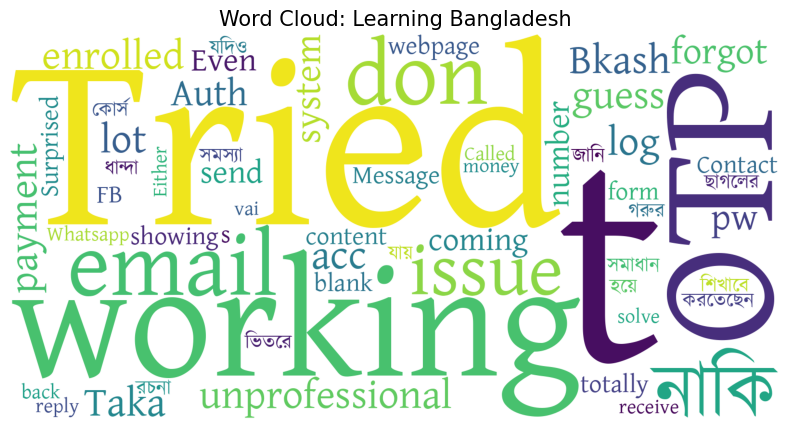

Processing Interactive Cares...
Saved: Cloud_Interactive Cares.png


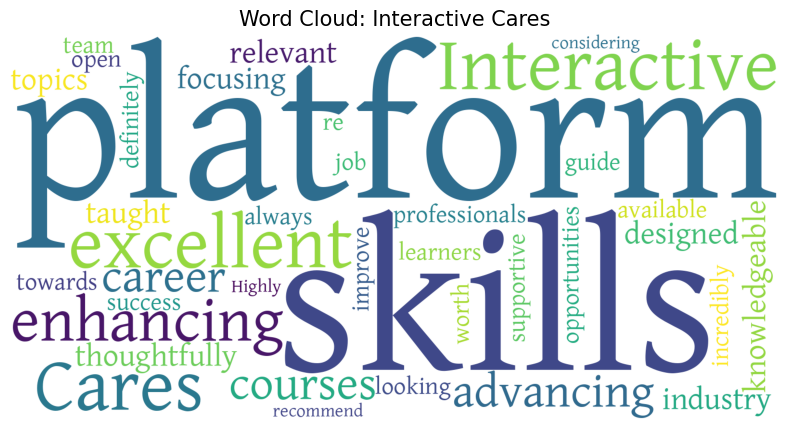

Processing eShikhon...
Saved: Cloud_eShikhon.png


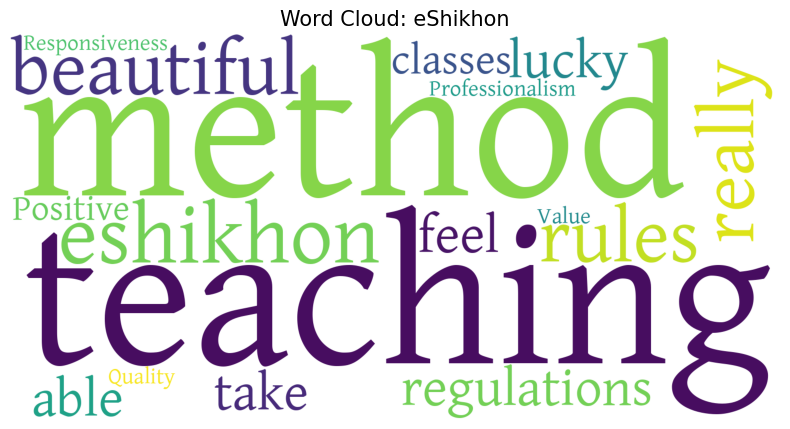

Processing Bohubrihi...
Saved: Cloud_Bohubrihi.png


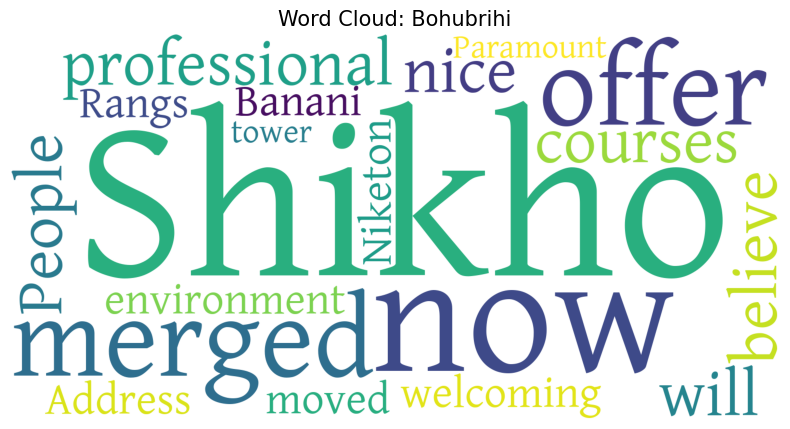

In [ ]:
for company in unique_companies:
    print(f"Processing {company}...")

    company_data = df[df['Company'] == company]
    reviews_text = " ".join(company_data['Review'])

    tokenized_text = tokenize_text(reviews_text)

    try:
        wordcloud = WordCloud(
            width=1600, height=800,
            background_color='white',
            stopwords=stopwords,
            font_path=font_name,
            regexp=r"[\u0980-\u09FF]+|[a-zA-Z]+",
            collocations=True
        ).generate(tokenized_text)


        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.title(f"Word Cloud: {company}", fontsize=15)


        save_name = f"Cloud_{company}.png"
        plt.savefig(save_name, dpi=300)
        print(f"Saved: {save_name}")
        plt.show()

    except Exception as e:
        print(f"Error: {e}")